In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [49]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing

from sklearn.datasets import load_boston, load_breast_cancer,load_iris,load_breast_cancer
from sklearn.datasets import load_wine,load_iris
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree

from sklearn import metrics
import graphviz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 결정트리
- 분류와 회귀에 사용되는 지도학습 방법
- 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
- if then else 결정 규칙을 통해 데이터 학습
- 트리의 깊이가 깊을 수록 복잡한 모델
- 결정트리장점
    - 이해와 해석이 쉽다
    - 시각화가 용이 하다
    - 많은 데이터 전처리가 필요하지 않다
    - 수치형과 범주형 데이터를 모두 다룰수있다

### 엔트로피

### 지니계수를 이용하여 데이터를 분할
- 지니계수 : 경제학에서 불평등지수를 나타낼 때 사용하는 것으로 0일 때 완전 평등, 1일 때 완전 불평등을 의미
- 머신러닝에서는 데이터가 다양한 값을 가질수록 평등하며 특정 값으로 쏠릴 때 불평등한 값이 됩니다.
- 다양성이 낮을수록 균일도가 높다는 의미로 1로 갈수록 균일도가 높아 지니계수가 높은 속성을 기준으로 분할

### Decision Tree Classifier의 파라미터

#### 핵심 파라미터

##### min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수 
( 과적합을 제어하는데 사용 )
- Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가<br>
##### min_samples_leaf: 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- min_samples_split과 함께 과적합 제어 용도<br>
- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요<br>
##### max_features: 최적의 분할을 위해 고려할 최대 feature 개수<
- Default = None → 데이터 세트의 모든 피처를 사용<br>
- int형으로 지정 →피처 갯수 / float형으로 지정 →비중<br>
- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정<br>
- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정<br>
##### max_depth	: 트리의 최대 깊이<br>
- default = None<br>
→ 완벽하게 클래스 값이 결정될 때 까지 분할<br>
또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할<br>
- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요<br>
##### max_leaf_nodes:	리프노드의 최대 개수<br>

In [5]:
iris = load_iris()

In [6]:
iris_df = pd.DataFrame( iris.data)
iris_df.columns = iris['feature_names']
iris_df['specis'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
model_Tree = DecisionTreeClassifier( criterion = 'entropy')

In [9]:
x_train, x_test, y_train, y_test = train_test_split(iris['data'],
                                                    iris['target'],
                                                    test_size = 0.2,
                                                    random_state = 1,
                                                    stratify = iris['target']
                                                   )

In [10]:
model_Tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
# export_graphviz(모델명, 저장할파일이름, class = target네임)
export_graphviz(model_Tree, out_file = 'tree.dot',
                class_names = iris['target_names'],
                feature_names = iris['feature_names']
               )


- export_graphviz 설치 폴더경로를 인식시켜줘야함
- (중요) 아래와같이 \ 로 표시되면 에러가 발생함
- os.environ['PATH'] += os.pathsep + 'C:/Users/master11/Desktop/Graphviz/bin/'
- \ -> / 바꾸기
https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/<br>



In [20]:
import os

In [21]:
os.environ['PATH'] += os.pathsep + 'C:/Users/master11/Desktop/Graphviz/bin/'

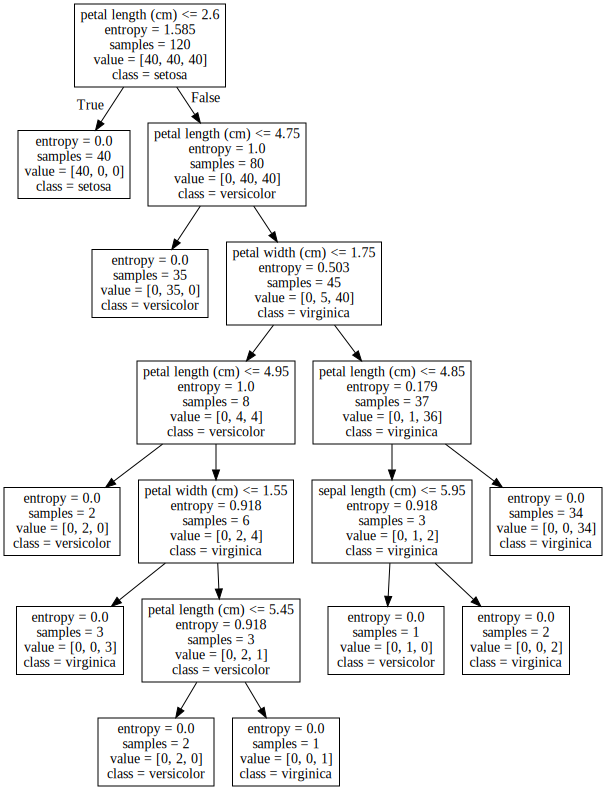

In [22]:
with open('tree.dot') as f:
    dot_graph = f.read()
    
# graphviz.Source로 읽어온 파일을 트리모양으로 표시해준다
graphviz.Source( dot_graph )    

In [23]:
model_Tree.score(x_test, y_test)

0.9666666666666667

In [28]:
model_Tree.feature_importances_

array([0.0144845 , 0.        , 0.92889461, 0.05662089])

In [24]:
import seaborn as sns

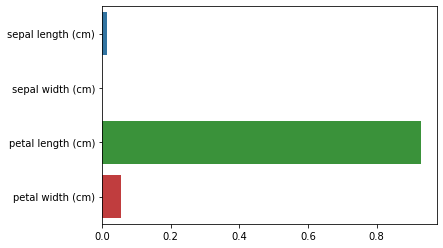

In [31]:
sns.barplot( x = model_Tree.feature_importances_, y = iris['feature_names'])
plt.show()

# 과소 또는 과대적합 확인

In [32]:
from sklearn.model_selection import validation_curve

In [33]:
pipe_tree = make_pipeline( DecisionTreeClassifier( criterion = 'entropy') )

In [36]:
pram_ragne = [2,3,4,5,6,7,8,9,10]


In [39]:
# validation_curve(estimator = 반드시파이프라인으로입력,
#                   X = x축값, y= y축값,
#                   param_name = grid서치처럼 사용모델명__파라미터,
#                   param_range = 자기가줄 파라미터 범위,
#                   scoring = 원하는 정확도 출력 방법, cv = 교차검증 횟수
#                     )
# 리턴값 : trian과 test(검증)의 스코어를 반환해줌
train_score, test_score = validation_curve( pipe_tree,X = x_train, y= y_train,
                    param_name = 'decisiontreeclassifier__max_depth',
                    param_range = pram_ragne,
                    scoring = 'f1_macro', # 라벨값이 다중이라서 macro평균값을추가
                    cv = 5,
                    )


In [41]:
# train_score param_range = [2,3,4...]인 경우의 교차검증값
# 2일때의 교차검증, 3일떄의 교차검증, 4일떄의 교차검증 순으로 행렬로 표시
# train_score행의수 = len(param_range) 
train_score.mean( axis = 1)

array([0.96451346, 0.97077722, 0.98958181, 0.99791616, 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [42]:
test_score.mean( axis = 1)

array([0.93300342, 0.94143791, 0.94156863, 0.94156863, 0.94156863,
       0.94156863, 0.94156863, 0.94156863, 0.94156863])

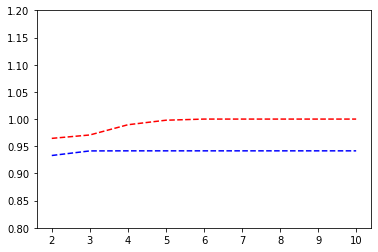

In [47]:
plt.ylim(0.8,1.2)
plt.plot( pram_ragne, train_score.mean(axis = 1), 'r--' )
plt.plot( pram_ragne, test_score.mean(axis = 1), 'b--' )
plt.show()
# train과 test의 차이가 작은 쪽이 과적합을 피할수 있다

In [48]:
# breat_cancel 트리로 vaildation curve그리기

In [50]:
breast = load_breast_cancer()

In [52]:
df = pd.DataFrame(breast.data)
df.columns = breast.feature_names
df['target'] = breast.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [53]:
x_train, x_test, y_train, y_test = train_test_split(breast['data'],
                                                    breast['target'],
                                                    test_size = 0.2,
                                                    random_state = 1,
                                                    stratify = breast['target']
                                                   )

In [54]:
model = make_pipeline(DecisionTreeClassifier(criterion = 'entropy'))

In [60]:
pram_range1 = [3,4,5,6,9]
train_score, test_score = validation_curve( model,X = x_train, y= y_train,
                    param_name = 'decisiontreeclassifier__max_depth',
                    param_range = pram_range1,
                    scoring = 'f1_macro', # 라벨값이 다중이라서 macro평균값을추가
                    cv = 5,
                    )

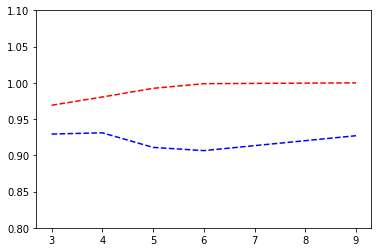

In [62]:
plt.ylim(0.8,1.1)
plt.plot( pram_range1, train_score.mean(axis = 1), 'r--' )
plt.plot( pram_range1, test_score.mean(axis = 1), 'b--' )
plt.show()